## 载入数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [3]:
target_url = ("http://archive.ics.uci.edu/ml/machine-"
              "learning-databases/wine-quality/winequality-red.csv")

In [4]:
columns_mapping = {
    'fixed acidity': '非挥发性酸',
    'volatile acidity': '挥发性酸',
    'citric acid': '柠檬酸',
    'residual sugar': '残留糖分',
    'chlorides': '氯化物',
    'free sulfur dioxide': '游离二氧化硫',
    'total sulfur dioxide': '总二氧化硫',
    'density': '密度',
    'pH': 'PH值',
    'sulphates': '亚硝酸盐',  # 百度翻译是：硫酸盐
    'alcohol': '酒精含量',
    'quality': '口感评分'
}

try:
    df_wine = pd.read_csv("../../data/wine.csv", header=0)
except Exception as e:
    print(e)
    df_wine = pd.read_csv(target_url, sep=";",header=0, prefix="V")
    df_wine.columns = columns_mapping.keys()
    df_wine.to_csv("../../data/wine.csv", index=False)

df_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [5]:
nrows, ncols = df_wine.shape
print("Number of Rows: ", nrows)
print("Number of Cols: ", ncols)

Number of Rows:  1599
Number of Cols:  12


## 红酒数据描述性统计信息

In [6]:
df_summary = df_wine.describe()
df_summary

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

## 绘制红酒数据的平行坐标图：未标准化

In [7]:
df_wine_unnormalized = df_wine.copy()

In [8]:
df_wine_unnormalized['color_value'] = (df_wine_unnormalized['quality'] - df_wine_unnormalized['quality'].mean()) /df_wine_unnormalized['quality'].std()
df_wine_unnormalized['color_value'] = 1/(1+np.exp(-df_wine_unnormalized['color_value']))
df_wine_unnormalized.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  color_value  
0      9.4        5     0.312689  
1      9.8        5     0.312689  
2      9.8        5     0.312689  
3      9.8        6     0.610807  
4      9.4        5     0.312689

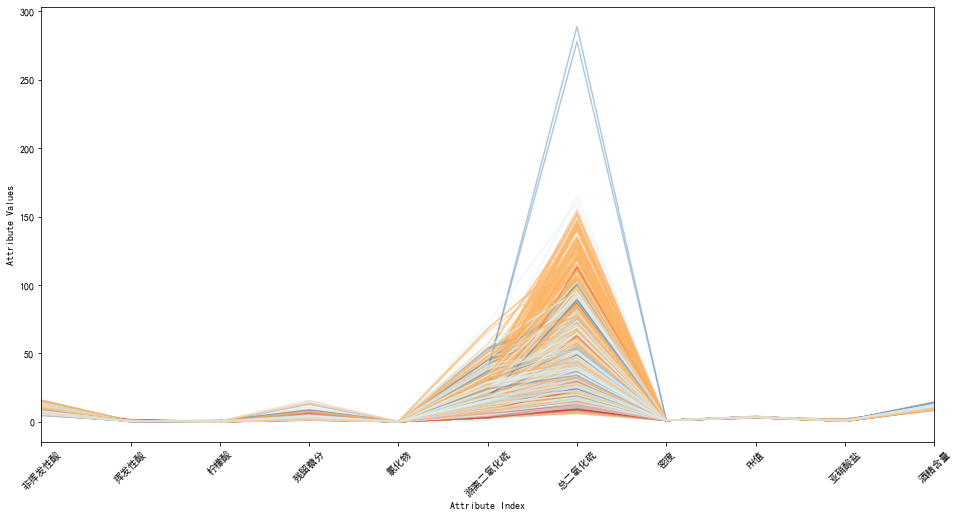

In [9]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)

for i in range(nrows):
    data_row = df_wine_unnormalized.iloc[i, :11]
    data_row.plot(alpha=0.5, color=plt.cm.RdYlBu(df_wine_unnormalized.iloc[i, -1]), ax=ax)

# 美化一下x轴输出 
ax.set_xticks(range(11))
ax.set_xticklabels([columns_mapping.get(label, label) for label in df_wine_unnormalized.columns[:11]])
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(45)
    label.set_fontsize(10)
ax.set_xlabel("Attribute Index")
ax.set_ylabel("Attribute Values")
plt.show()

上图主要的问题：对取值较小的变量进行了压缩，导致完全无法辨识图中信息，所以需要对数据进行z-score

## 绘制红酒数据的平行坐标图：标准化数据（z-score）

In [10]:
df_wine_normalized = df_wine.copy()

In [11]:
df_wine_normalized = (df_wine_normalized - df_wine_normalized.mean())/df_wine_normalized.std()
df_wine_normalized['color_value'] = 1/(1+np.exp(-df_wine_normalized['quality']))
df_wine_normalized.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.528194          0.961576    -1.391037       -0.453077  -0.243630   
1      -0.298454          1.966827    -1.391037        0.043403   0.223805   
2      -0.298454          1.296660    -1.185699       -0.169374   0.096323   
3       1.654339         -1.384011     1.483689       -0.453077  -0.264878   
4      -0.528194          0.961576    -1.391037       -0.453077  -0.243630   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.466047             -0.379014  0.558100  1.288240  -0.579025   
1             0.872365              0.624168  0.028252 -0.719708   0.128910   
2            -0.083643              0.228975  0.134222 -0.331073  -0.048074   
3             0.107558              0.411372  0.664069 -0.978798  -0.461036   
4            -0.466047             -0.379014  0.558100  1.288240  -0.579025   

    alcohol   quality  color_value  
0 -0.959946 -0.787576     0.312689  
1 -0.584594 -0.787576     0.312689  
2 -0.584594 -0.787576     0.312689  
3 -0.584594  0.450707     0.610807  
4 -0.959946 -0.787576     0.312689

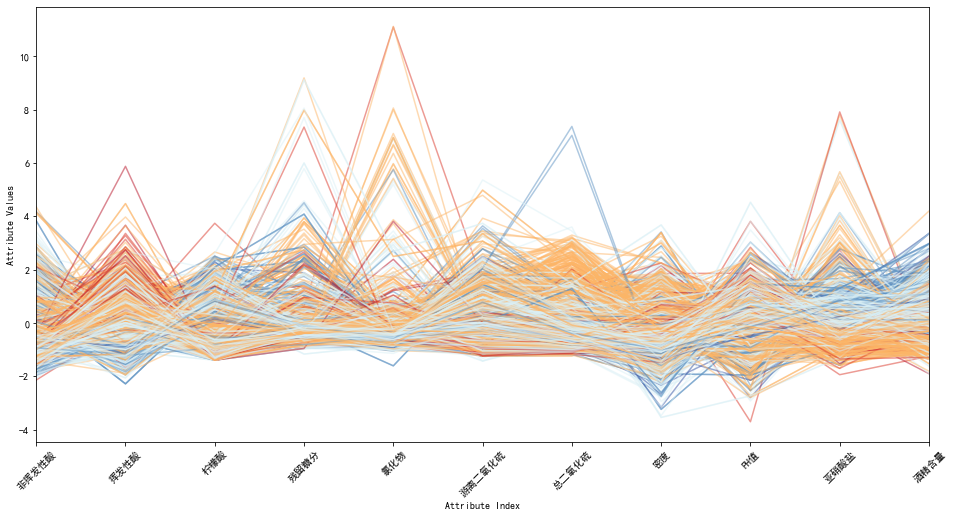

In [12]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)

for i in range(nrows):
    data_row = df_wine_normalized.iloc[i, :11]
    data_row.plot(alpha=0.5, color=plt.cm.RdYlBu(df_wine_normalized.iloc[i, -1]), ax=ax)

# 美化一下x轴输出 
ax.set_xticks(range(11))
ax.set_xticklabels([columns_mapping.get(label, label) for label in df_wine_normalized.columns[:11]])
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(45)
    label.set_fontsize(10)
ax.set_xlabel("Attribute Index")
ax.set_ylabel("Attribute Values")
plt.show()

深蓝色：表示高口感评价。最右边，深蓝色聚集在酒精含量较高的区域，说明酒精含量越高，口感越好。这是比较明显的相关性。  
深红色：表示低口感评价。最左边，深红色聚集在挥发性酸的高值区域，说明挥发性越强，口感越差。这也是比较明显的相关性。  